In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.classification import *

In [95]:
df = pd.read_csv('students_adaptability_level_online_education.csv')

In [96]:
#rename columns
df.columns = ['Gender', 'Age', 'Education_level','Institution_Type','IT_Student', 'Location','Load_shedding',
                    'Financial_Condition','Internet_Type','Network_Type','Class_Duration',
                    'Self_Lms', 'Device','Adaptivity_Level']

In [101]:
#spliting dataset
data_train,data_test = train_test_split(df, test_size = 0.1,random_state = 42)

# Adapitability model imbalanced

In [102]:
classification = setup(data = data_train, target = 'Adaptivity_Level', session_id=42) 

,Description,Value
0,session_id,42
1,Target,Adaptivity_Level
2,Target Type,Multiclass
3,Label Encoded,"High: 0, Low: 1, Moderate: 2"
4,Original Data,"(1084, 14)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [103]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8892,0.9641,0.8440,0.8916,0.8883,0.8029,0.8050,0.3200
dt,Decision Tree Classifier,0.8840,0.9336,0.8404,0.8862,0.8835,0.7941,0.7959,0.0190
rf,Random Forest Classifier,0.8826,0.9623,0.8304,0.8851,0.8810,0.7903,0.7926,0.3020
lightgbm,Light Gradient Boosting Machine,0.8813,0.9500,0.8197,0.8863,0.8792,0.7871,0.7902,0.1410
gbc,Gradient Boosting Classifier,0.8300,0.9172,0.7493,0.8354,0.8255,0.6892,0.6942,0.4890
knn,K Neighbors Classifier,0.7731,0.8858,0.6658,0.7761,0.7669,0.5915,0.5997,0.0450
lr,Logistic Regression,0.7376,0.8050,0.6250,0.7455,0.7294,0.5170,0.5242,0.0710
lda,Linear Discriminant Analysis,0.7085,0.8039,0.6449,0.7140,0.7046,0.4766,0.4833,0.0260
ridge,Ridge Classifier,0.7059,0.0000,0.5622,0.7015,0.6917,0.4521,0.4631,0.0160
ada,Ada Boost Classifier,0.6677,0.6304,0.5459,0.6635,0.6590,0.4001,0.4039,0.1530


## best model (Extra tree classifier)

In [104]:
#the best model was extra tree classifier
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


In [ ]:
#et acuracy: 0.88

In [105]:
#evaluating  random forest classifier
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9079,0.9738,0.8833,0.9110,0.9078,0.8343,0.8367
1,0.9079,0.9548,0.8389,0.9069,0.9065,0.8335,0.8344
2,0.8947,0.9630,0.7833,0.8918,0.8906,0.8077,0.8098
3,0.8816,0.9443,0.8180,0.8835,0.8800,0.7863,0.7897
4,0.8684,0.9740,0.8095,0.8723,0.8670,0.7613,0.7632
5,0.8421,0.9695,0.7751,0.8426,0.8400,0.7245,0.7273
6,0.8947,0.9714,0.9214,0.9038,0.8964,0.8208,0.8227
7,0.8816,0.9631,0.8398,0.8832,0.8809,0.7928,0.7945
8,0.9600,0.9818,0.9274,0.9613,0.9596,0.9286,0.9295


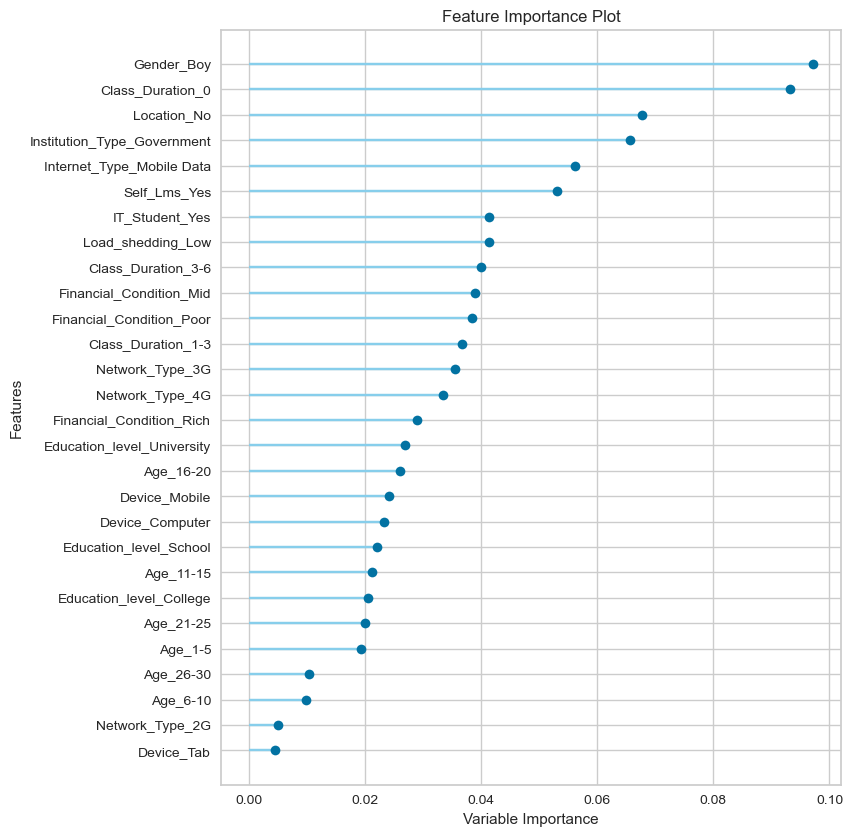

In [106]:
#most important feature random forest classifier
plot_model(et, plot='feature_all')

In [131]:
#confusion matrix extra tree classifier
matrix_et = plot_model(et, plot = 'confusion_matrix')
matrix_et = plot_model(et, plot = 'confusion_matrix',save=True)

## Decision tree(umbalanced model)

In [109]:
# evaluating decision tree model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9079,0.9526,0.8833,0.9162,0.9092,0.8355,0.8389
1,0.8553,0.8861,0.8000,0.8562,0.8551,0.7404,0.7413
2,0.8947,0.9346,0.7833,0.8931,0.8925,0.8092,0.8111
3,0.8816,0.9213,0.8202,0.8830,0.8816,0.7890,0.7900
4,0.8553,0.9034,0.8009,0.8543,0.8542,0.7408,0.7410
5,0.8553,0.9576,0.7862,0.8576,0.8527,0.7481,0.7529
6,0.9079,0.9464,0.9299,0.9119,0.9082,0.8413,0.8424
7,0.8684,0.9518,0.8287,0.8690,0.8678,0.7691,0.7698
8,0.9600,0.9733,0.9274,0.9613,0.9596,0.9286,0.9295


In [110]:
#tuned_model decision tree
tuned_dt = tune_model(dt,custom_grid={'max_depth': [3]})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6053,0.6835,0.4250,0.5540,0.5740,0.2390,0.2467
1,0.6184,0.6986,0.4222,0.6001,0.5682,0.2363,0.2801
2,0.6316,0.6989,0.4417,0.5807,0.5969,0.2849,0.2982
3,0.6711,0.7031,0.5182,0.6889,0.6509,0.3746,0.4023
4,0.6447,0.6677,0.4519,0.6175,0.6073,0.3096,0.3406
5,0.6053,0.6899,0.4784,0.5941,0.5959,0.2837,0.2864
6,0.5789,0.6319,0.4485,0.5692,0.5601,0.2228,0.2325
7,0.7105,0.7979,0.6352,0.7126,0.7110,0.4915,0.4921
8,0.6933,0.7648,0.5897,0.6891,0.6901,0.4466,0.4477


In [112]:
#Plot decision tree
#tree = plot_model(tuned_dt, plot = 'tree')
tree = plot_model(tuned_dt, plot = 'tree',save=True)

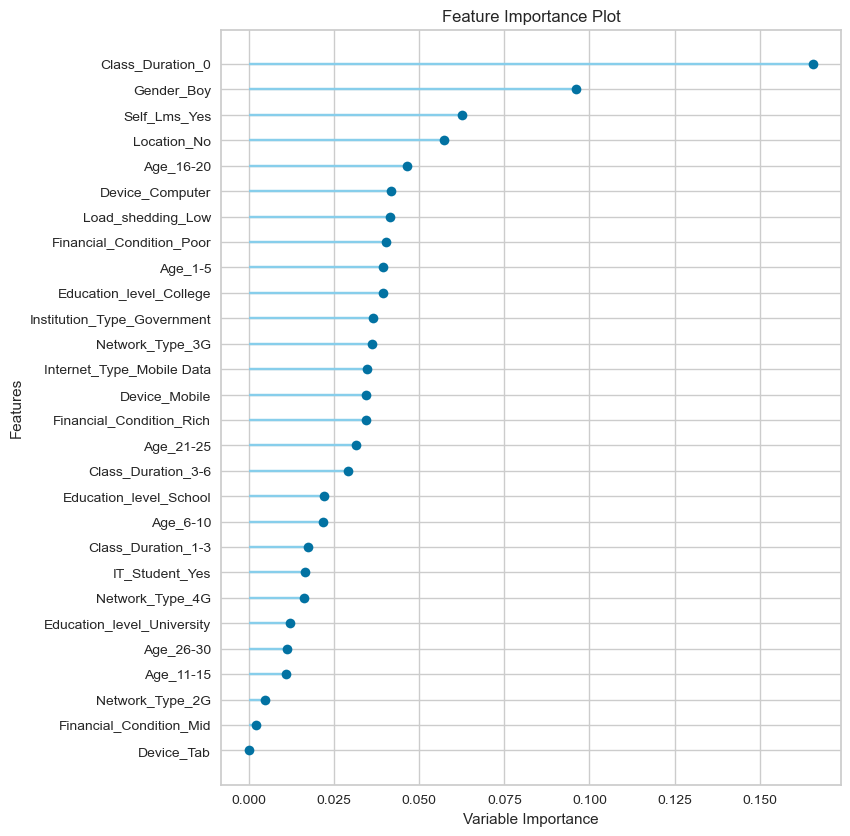

In [113]:
#most important feature com modelo de arvore de decisao
plot_model(dt, plot='feature_all')

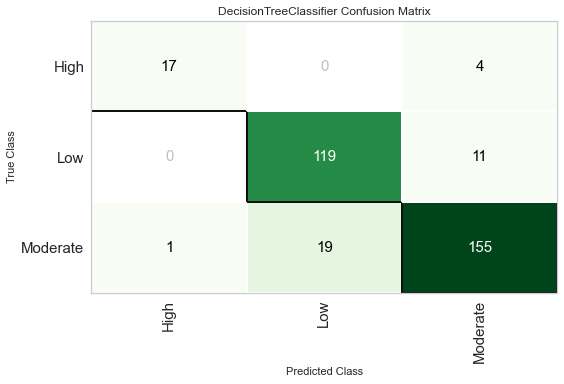

In [114]:
#confusion matrix decision tree
matrix_dt = plot_model(dt, plot = 'confusion_matrix')
#matrix_dt = plot_model(dt, plot = 'confusion_matrix_dt', save=True)

## Final model(decision tree)

In [35]:
final_dt = finalize_model(dt)

In [36]:
predict_model(final_dt, data=data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.0000,0.9637,0,0,0,0,0


,Gender,Age,Education_level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level,Label,Score
574,Girl,16-20,College,Non Government,No,No,High,Mid,Mobile Data,3G,0,No,Mobile,Low,Low,1.0000
922,Boy,21-25,University,Non Government,Yes,Yes,Low,Mid,Wifi,3G,1-3,No,Computer,Moderate,Moderate,1.0000
937,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low,Low,0.6364
423,Girl,16-20,College,Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Low,Low,1.0000
692,Boy,21-25,University,Non Government,Yes,Yes,Low,Mid,Wifi,4G,3-6,Yes,Computer,Moderate,Moderate,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Girl,1-5,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate,Moderate,1.0000
192,Boy,21-25,University,Non Government,Yes,Yes,High,Mid,Mobile Data,3G,3-6,Yes,Mobile,Moderate,Moderate,1.0000
803,Girl,1-5,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate,Moderate,1.0000
337,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low,Low,1.0000


## Final model(extra tree classifier)

In [115]:
final_et = finalize_model(et)

In [116]:
predict_model(final_et, data=data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.0000,0.9835,0,0,0,0,0


,Gender,Age,Education_level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level,Label,Score
101,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Computer,Moderate,Low,0.5667
946,Boy,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate,Moderate,1.0000
306,Boy,16-20,College,Government,Yes,Yes,Low,Mid,Wifi,4G,1-3,Yes,Tab,Moderate,Moderate,1.0000
109,Girl,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,3G,1-3,Yes,Mobile,High,High,1.0000
1061,Boy,21-25,University,Non Government,Yes,No,Low,Mid,Mobile Data,3G,1-3,Yes,Computer,Moderate,Moderate,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Boy,16-20,College,Government,No,No,High,Poor,Mobile Data,2G,1-3,No,Mobile,Low,Low,1.0000
718,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate,Moderate,0.7188
1055,Girl,11-15,School,Government,No,No,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Low,Low,1.0000
274,Girl,6-10,School,Non Government,No,Yes,Low,Mid,Mobile Data,2G,1-3,No,Mobile,Low,Low,1.0000


# Adapitability model balanced

In [117]:
classification = setup(data = data_train, target = 'Adaptivity_Level', session_id=42,fix_imbalance = True) 

,Description,Value
0,session_id,42
1,Target,Adaptivity_Level
2,Target Type,Multiclass
3,Label Encoded,"High: 0, Low: 1, Moderate: 2"
4,Original Data,"(1084, 14)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [118]:
#comparing models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8694,0.9614,0.8676,0.8859,0.8733,0.7757,0.7797,0.2920
et,Extra Trees Classifier,0.8681,0.9633,0.8710,0.8840,0.8719,0.7732,0.7772,0.2450
lightgbm,Light Gradient Boosting Machine,0.8681,0.9516,0.8620,0.8847,0.8724,0.7729,0.7766,0.1450
dt,Decision Tree Classifier,0.8602,0.9231,0.8643,0.8783,0.8648,0.7600,0.7641,0.0280
gbc,Gradient Boosting Classifier,0.7982,0.9031,0.7773,0.8188,0.8040,0.6546,0.6586,0.4300
knn,K Neighbors Classifier,0.7890,0.9108,0.7807,0.8095,0.7925,0.6400,0.6466,0.0530
lda,Linear Discriminant Analysis,0.6913,0.7982,0.6871,0.7199,0.6960,0.4765,0.4844,0.0280
lr,Logistic Regression,0.6873,0.7945,0.6854,0.7239,0.6952,0.4807,0.4893,0.1080
ridge,Ridge Classifier,0.6794,0.0000,0.6825,0.7121,0.6856,0.4650,0.4731,0.0290
ada,Ada Boost Classifier,0.6558,0.6225,0.6236,0.6762,0.6584,0.4154,0.4215,0.1410


In [119]:
#best model random forest
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [120]:
# evaluation random forest model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9079,0.9638,0.8861,0.9120,0.9091,0.8365,0.8373
1,0.8684,0.9621,0.8583,0.8827,0.8729,0.7712,0.7730
2,0.8816,0.9729,0.8694,0.8961,0.8863,0.7947,0.7967
3,0.8158,0.9477,0.8201,0.8457,0.8246,0.6862,0.6909
4,0.8947,0.9666,0.9272,0.9061,0.8964,0.8193,0.8228
5,0.8684,0.9709,0.8703,0.8732,0.8684,0.7741,0.7772
6,0.8289,0.9554,0.8786,0.8908,0.8438,0.7244,0.7407
7,0.8816,0.9620,0.8398,0.8832,0.8809,0.7928,0.7945
8,0.9333,0.9853,0.9103,0.9377,0.9340,0.8835,0.8855


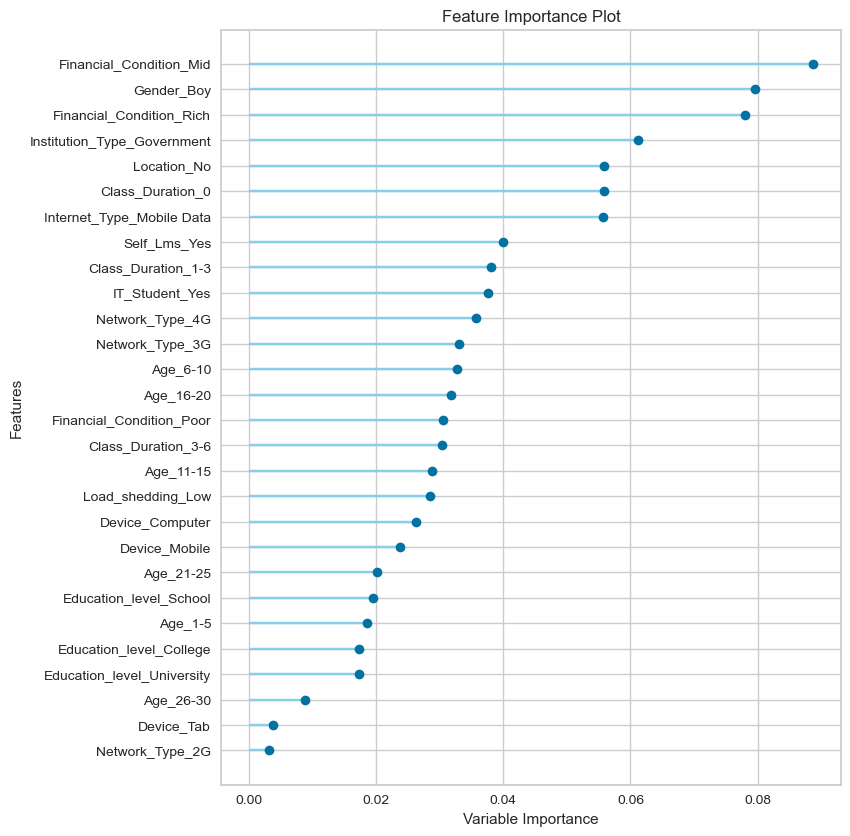

In [121]:
# most important feature
plot_model(rf, plot='feature_all')


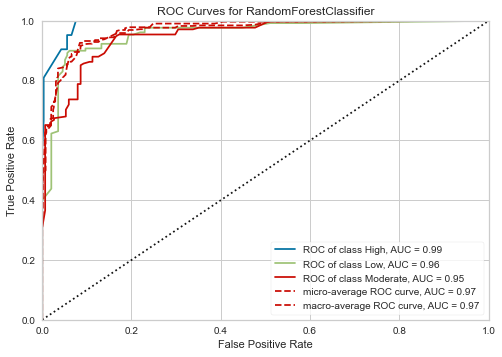

In [124]:
#Plotting AUC rf
plot_model(rf, plot = 'auc')
#fig = plt.gcf()
#plt.show()
#fig.savefig('teste.png', format='png')


In [125]:
#confusion matrix et
plot_model(rf, plot = 'confusion_matrix', save=True)


'Confusion Matrix.png'

## Decision tree balanced dataset

In [126]:
#arvore de decisao
dt_balanced = create_model('dt')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.9463,0.8722,0.9057,0.8958,0.8114,0.8168
1,0.8421,0.8967,0.8389,0.8638,0.8486,0.7274,0.7306
2,0.8816,0.9115,0.8667,0.8977,0.8864,0.7935,0.7958
3,0.8158,0.8936,0.8223,0.8531,0.8273,0.6907,0.6971
4,0.8421,0.8971,0.8864,0.8500,0.8430,0.7277,0.7294
5,0.8684,0.9435,0.8703,0.8732,0.8684,0.7741,0.7772
6,0.8421,0.9485,0.8872,0.9040,0.8581,0.7450,0.7605
7,0.8553,0.9318,0.8176,0.8553,0.8553,0.7471,0.7471
8,0.9200,0.9400,0.9436,0.9252,0.9209,0.8609,0.8621


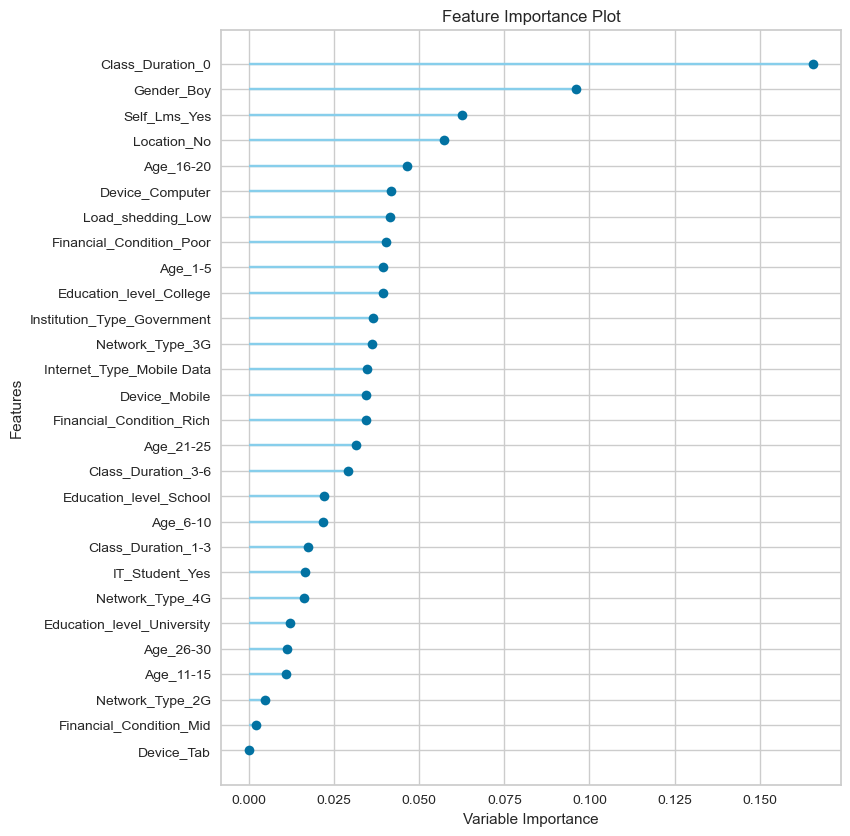

In [127]:
#most important feature in decision tree
plot_model(dt, plot='feature_all')

In [55]:
#tuned_model decision tree 
tuned_dt = tune_model(dt,custom_grid={'max_depth': [3]})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6842,0.7684,0.7276,0.6830,0.6832,0.4521,0.4522
1,0.5789,0.7072,0.5189,0.7415,0.5852,0.3007,0.3295
2,0.5921,0.7029,0.5691,0.7488,0.6024,0.3305,0.3588
3,0.5658,0.6515,0.5443,0.6773,0.5429,0.2493,0.2793
4,0.6316,0.6701,0.5667,0.7638,0.6103,0.3488,0.3920
5,0.5132,0.6430,0.4472,0.6996,0.5335,0.1845,0.2024
6,0.6184,0.7393,0.6260,0.7567,0.6303,0.3694,0.3953
7,0.5263,0.6304,0.5126,0.6648,0.5157,0.2072,0.2296
8,0.5600,0.6956,0.5838,0.7164,0.5645,0.2738,0.2981


In [93]:
#Plot decision tree 
tree = plot_model(tuned_dt, plot = 'tree',save=True)


In [92]:
#confusion matrix Decision tree
plot_model(dt, plot = 'confusion_matrix', save = True)

'Confusion Matrix.png'

## Final model(Random forest)

In [128]:
final_rf = finalize_model(rf)

In [129]:
predict_model(rf, data=data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0000,0.9699,0,0,0,0,0


,Gender,Age,Education_level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level,Label,Score
101,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Computer,Moderate,Moderate,0.5565
946,Boy,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate,Moderate,0.9938
306,Boy,16-20,College,Government,Yes,Yes,Low,Mid,Wifi,4G,1-3,Yes,Tab,Moderate,Moderate,0.9700
109,Girl,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,3G,1-3,Yes,Mobile,High,High,0.7900
1061,Boy,21-25,University,Non Government,Yes,No,Low,Mid,Mobile Data,3G,1-3,Yes,Computer,Moderate,Moderate,0.9800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Boy,16-20,College,Government,No,No,High,Poor,Mobile Data,2G,1-3,No,Mobile,Low,Low,0.8100
718,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate,Moderate,0.8222
1055,Girl,11-15,School,Government,No,No,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Low,Low,1.0000
274,Girl,6-10,School,Non Government,No,Yes,Low,Mid,Mobile Data,2G,1-3,No,Mobile,Low,Low,0.7600


## Final model(Decision Tree)

In [61]:
final_dt= finalize_model(dt)

In [62]:
predict_model(final_dt, data=data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.0000,0.9635,0,0,0,0,0


,Gender,Age,Education_level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level,Label,Score
574,Girl,16-20,College,Non Government,No,No,High,Mid,Mobile Data,3G,0,No,Mobile,Low,Low,1.0000
922,Boy,21-25,University,Non Government,Yes,Yes,Low,Mid,Wifi,3G,1-3,No,Computer,Moderate,Moderate,1.0000
937,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low,Low,0.7037
423,Girl,16-20,College,Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Low,Low,1.0000
692,Boy,21-25,University,Non Government,Yes,Yes,Low,Mid,Wifi,4G,3-6,Yes,Computer,Moderate,Moderate,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Girl,1-5,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate,Moderate,1.0000
192,Boy,21-25,University,Non Government,Yes,Yes,High,Mid,Mobile Data,3G,3-6,Yes,Mobile,Moderate,Moderate,1.0000
803,Girl,1-5,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate,Moderate,1.0000
337,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low,Low,1.0000
